<a href="https://colab.research.google.com/github/sumit1311singh/CreditCardFraud/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv("/content/creditcard.csv") 

In [ ]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 176396 rows and 31 columns.


In [ ]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
156433,108114.0,1.963352,0.866045,-1.278873,4.017156,0.959760,-0.631967,0.743404,-0.442813,-0.054970,1.154587,-0.275755,-2.863742,1.285502,2.051427,-1.943707,0.146565,0.277432,-0.533143,-1.626947,-0.367247,-0.027658,0.241961,0.000480,-0.074914,0.373792,0.136853,-0.104521,-0.074081,11.86,0.0
48393,43621.0,-1.575792,-0.276286,2.467402,1.601958,-0.148931,0.075021,-0.398645,0.117260,0.053229,0.117213,-0.878725,-0.478066,0.330342,-0.273729,2.527110,0.211465,-0.327878,1.151360,1.354388,-0.109521,0.190472,0.967771,0.316591,-0.093145,0.306440,0.073732,0.023077,0.126770,43.38,0.0
129845,79224.0,-1.008448,1.035178,1.603454,0.645998,-1.229471,0.491026,0.290831,0.484487,-0.184481,-0.577355,-0.458186,0.183711,0.374903,0.064614,1.424540,0.446281,-0.298518,0.050280,-0.929369,-0.294707,0.242781,0.627189,-0.028352,0.080375,-0.152813,-0.391159,-0.199777,-0.073262,144.00,0.0
20704,31221.0,-0.630795,0.858425,1.178325,0.694542,1.315101,0.505478,0.619944,0.047037,-0.950351,-0.343374,-1.271832,0.041885,1.411538,0.077979,1.560471,-0.393385,-0.301094,0.021276,0.984091,0.272226,0.067261,0.218799,-0.452879,-1.275558,0.644075,-0.035694,0.089237,0.069219,15.62,0.0
123202,76846.0,-1.078440,1.149222,2.380293,1.158511,-0.762033,0.678923,-0.503527,0.904631,-0.490045,-0.279193,1.233758,0.994617,0.137691,0.195198,0.476286,-0.263004,0.258245,0.489640,0.525244,0.092698,0.268458,0.934707,-0.271961,0.250472,0.252020,-0.042171,0.268866,0.079949,2.00,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176396 entries, 0 to 176395
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    176396 non-null  float64
 1   V1      176396 non-null  float64
 2   V2      176396 non-null  float64
 3   V3      176396 non-null  float64
 4   V4      176396 non-null  float64
 5   V5      176396 non-null  float64
 6   V6      176396 non-null  float64
 7   V7      176396 non-null  float64
 8   V8      176396 non-null  float64
 9   V9      176396 non-null  float64
 10  V10     176395 non-null  float64
 11  V11     176395 non-null  float64
 12  V12     176395 non-null  float64
 13  V13     176395 non-null  float64
 14  V14     176395 non-null  float64
 15  V15     176395 non-null  float64
 16  V16     176395 non-null  float64
 17  V17     176395 non-null  float64
 18  V18     176395 non-null  float64
 19  V19     176395 non-null  float64
 20  V20     176395 non-null  float64
 21  V21     17

In [ ]:
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,176396.000,176395.000
mean,62982.146,87.865
std,29342.892,246.831
min,0.000,0.000
25%,41793.750,5.520
50%,62028.000,22.000
75%,79933.000,77.600
max,122746.000,19656.530


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


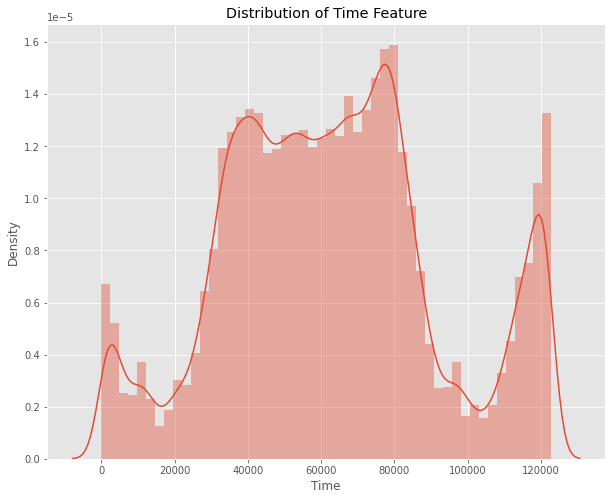

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


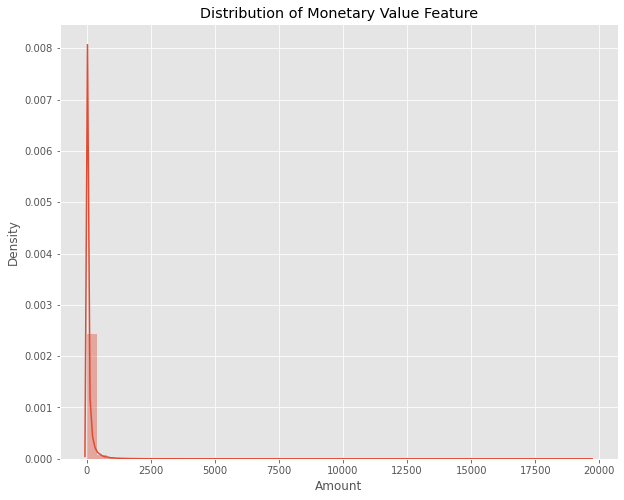

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

In [ ]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 176033 non-fraudulent transactions (99.795%) and 362 fraudulent transactions (0.205%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

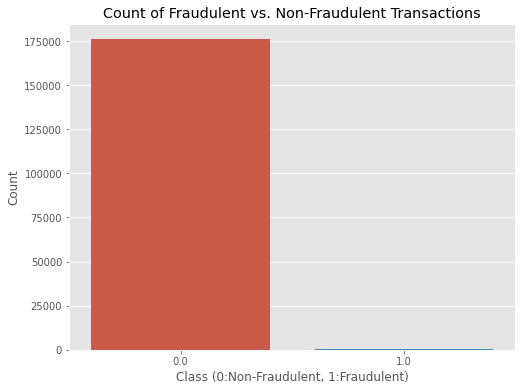

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [ ]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000e+00,0.087,5.657e-04,-0.261,-6.246e-02,0.117,-0.037,5.143e-02,-3.469e-02,1.547e-02,2.500e-02,-0.141,4.482e-02,-1.266e-02,-0.035,-0.099,0.009,-5.857e-02,6.498e-02,1.366e-02,-0.032,2.694e-02,0.102,0.037,-8.178e-03,-1.509e-01,-4.632e-02,4.319e-04,-0.002,-0.018,-9.229e-03
V1,8.677e-02,1.000,-1.954e-02,0.100,-2.889e-02,0.022,0.036,7.739e-02,7.152e-03,-1.029e-02,-4.184e-03,0.004,-1.035e-02,1.995e-02,0.052,0.026,0.038,4.496e-02,1.051e-02,3.039e-03,-0.065,-1.074e-02,-0.026,-0.057,-1.047e-02,1.098e-01,-1.648e-03,-6.526e-03,0.094,-0.235,-1.423e-01
V2,5.657e-04,-0.020,1.000e+00,-0.080,3.305e-02,-0.035,0.011,-1.952e-02,-1.679e-02,-3.497e-04,1.636e-02,0.028,-3.378e-02,3.078e-02,-0.006,0.043,0.006,-5.113e-02,-2.239e-02,4.851e-03,-0.059,-2.319e-02,-0.017,0.013,-9.635e-03,-5.554e-02,-2.224e-02,-2.253e-03,0.010,-0.544,1.220e-01
V3,-2.606e-01,0.100,-8.046e-02,1.000,-4.155e-02,0.088,-0.037,1.429e-01,-4.152e-02,2.759e-02,7.345e-02,-0.060,1.076e-01,-6.694e-02,0.017,-0.068,-0.015,8.418e-02,-6.479e-03,-1.048e-02,-0.072,2.506e-02,0.112,0.004,1.091e-02,-7.959e-02,3.322e-02,-2.229e-02,0.019,-0.199,-2.722e-01
V4,-6.246e-02,-0.029,3.305e-02,-0.042,1.000e+00,-0.007,-0.017,-3.393e-02,1.721e-02,9.746e-04,-5.516e-02,0.004,-8.806e-03,6.367e-03,-0.007,-0.032,-0.061,6.899e-04,-2.361e-02,9.221e-03,0.012,1.387e-02,0.028,0.002,-7.492e-04,-1.038e-02,-1.308e-02,3.312e-03,-0.006,0.095,1.567e-01
V5,1.172e-01,0.022,-3.489e-02,0.088,-6.882e-03,1.000,0.044,3.143e-02,-1.200e-02,5.126e-02,5.440e-02,-0.010,-2.373e-02,6.092e-02,0.049,0.040,0.081,-4.128e-03,4.593e-02,1.129e-02,-0.049,-2.519e-02,-0.043,0.015,-1.041e-02,-2.196e-02,-3.639e-02,1.294e-02,-0.005,-0.379,-1.407e-01
V6,-3.742e-02,0.036,1.063e-02,-0.037,-1.713e-02,0.044,1.000,7.530e-03,-2.971e-02,2.050e-02,-6.931e-03,-0.062,1.328e-02,-1.464e-02,0.010,-0.072,-0.010,7.767e-03,3.276e-02,5.726e-02,0.032,1.795e-02,0.025,-0.017,-8.895e-03,2.737e-02,1.205e-02,-1.727e-02,-0.006,0.202,-5.189e-02
V7,5.143e-02,0.077,-1.952e-02,0.143,-3.393e-02,0.031,0.008,1.000e+00,3.380e-02,5.098e-02,8.199e-02,-0.011,4.490e-02,2.548e-02,0.034,0.042,0.058,5.358e-02,4.223e-02,-2.962e-02,0.042,2.431e-02,-0.040,0.019,-6.869e-04,-6.463e-02,-2.524e-02,-4.234e-02,-0.026,0.359,-2.577e-01
V8,-3.469e-02,0.007,-1.679e-02,-0.042,1.721e-02,-0.012,-0.030,3.380e-02,1.000e+00,-1.366e-02,-6.585e-03,-0.004,-1.348e-04,-9.753e-03,-0.023,-0.012,-0.019,-1.328e-02,-1.145e-02,2.197e-02,-0.018,3.465e-03,0.017,-0.031,8.302e-03,1.790e-02,1.427e-02,2.630e-02,0.016,-0.089,2.625e-02
V9,1.547e-02,-0.010,-3.497e-04,0.028,9.746e-04,0.051,0.021,5.098e-02,-1.366e-02,1.000e+00,-3.878e-03,0.006,-1.076e-01,5.875e-02,0.088,-0.121,-0.034,7.821e-02,1.868e-02,-2.385e-04,0.012,1.246e-02,0.040,-0.025,3.890e-03,4.753e-02,4.293e-02,1.952e-03,-0.029,-0.030,-1.131e-01


Text(0.5, 1.0, 'Heatmap of Correlation')

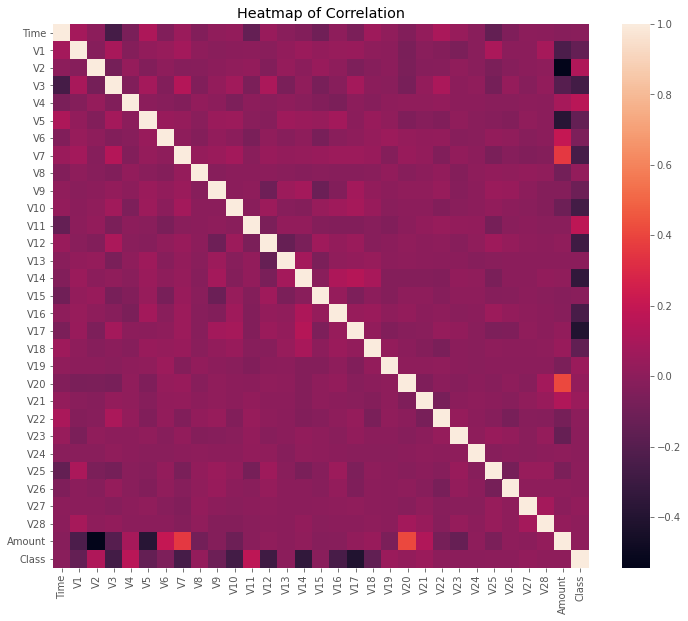

In [ ]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [ ]:
#skewness
skew_ = df.skew()
skew_

Time       0.178
V1        -3.456
V2        -4.531
V3        -3.802
V4         0.492
V5        -0.691
V6         1.243
V7        -2.176
V8        -9.342
V9         0.614
V10        0.681
V11        0.407
V12       -2.298
V13        0.132
V14       -2.422
V15       -0.520
V16       -1.557
V17       -5.294
V18       -0.416
V19       -0.015
V20        1.841
V21        3.765
V22       -0.324
V23       -5.769
V24       -0.574
V25       -0.572
V26        0.643
V27       -2.874
V28        9.052
Amount    15.511
Class     22.007
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [ ]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [ ]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
36236,38448.0,-0.244,0.624,1.374,-0.505,0.142,-0.879,1.002,-0.285,-0.301,-0.359,-0.019,-0.698,-1.373,0.359,1.027,-0.478,0.176,-0.889,-0.216,-0.044,-0.014,0.075,-0.121,0.431,-0.217,0.952,-0.207,-1.885e-01,15.14,0.0,-0.295,-0.836
33396,37216.0,1.238,0.280,-0.032,0.448,0.066,-0.636,0.306,-0.209,-0.513,0.112,1.286,1.377,1.137,0.371,-0.007,0.241,-0.721,-0.020,0.289,0.010,-0.006,0.006,-0.138,0.071,0.616,0.365,-0.051,-2.800e-03,17.89,0.0,-0.283,-0.878
4995,4560.0,1.109,0.055,1.068,1.762,-0.479,0.333,-0.468,0.091,2.155,-0.629,0.095,-1.841,1.426,1.044,-1.440,-0.848,1.172,-0.614,-0.461,-0.229,-0.232,-0.061,-0.065,0.049,0.588,-0.297,0.045,1.744e-02,15.00,0.0,-0.295,-1.991
132439,79987.0,1.309,-1.413,1.314,-1.144,-2.151,-0.125,-1.548,0.098,-1.436,1.376,1.134,0.543,1.147,-0.906,-1.034,-0.380,0.507,0.386,0.111,-0.190,-0.141,0.069,0.030,0.548,0.202,-0.233,0.072,3.400e-02,58.00,0.0,-0.121,0.580
137174,82048.0,-0.941,0.959,0.650,-0.276,0.644,1.487,-0.134,1.177,-0.669,-0.738,1.833,0.503,-0.920,0.387,1.380,-0.420,1.068,-1.313,-1.231,-0.131,-0.071,-0.239,0.160,-1.426,-0.466,0.208,0.177,-7.257e-04,17.98,0.0,-0.283,0.650


In [ ]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [ ]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (158864, 31)
Test Shape: (17532, 31)


In [ ]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [ ]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 324 fraudulent transactions in the train data.


In [ ]:
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [ ]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
137732,1.948,-0.564,-0.156,0.239,-0.489,0.453,-1.048,0.134,2.444,-0.238,0.895,-1.691,2.150,1.208,-0.618,1.119,-0.534,1.104,0.148,-0.103,-0.112,-0.003,0.165,-1.063,-0.519,0.483,-0.048,-0.059,0.0,-0.198,1.175
95963,-0.314,1.123,1.142,-0.023,0.192,-0.773,0.712,-0.050,-0.368,-0.512,-0.536,-0.210,0.160,-0.447,0.922,0.489,-0.121,-0.019,0.044,0.125,-0.287,-0.757,-0.057,-0.027,-0.113,0.094,0.245,0.095,0.0,-0.338,0.239
106083,1.217,0.357,0.048,0.915,0.247,-0.188,0.239,-0.034,-0.402,0.186,0.708,0.797,0.186,0.580,0.173,0.587,-0.969,0.045,0.450,-0.068,-0.465,-1.453,0.096,-0.579,0.329,-0.805,0.004,0.014,0.0,-0.271,0.402
97313,1.230,-0.156,0.181,-0.119,-0.316,-0.135,-0.320,0.147,0.174,0.042,1.113,0.157,-1.185,0.649,0.756,0.298,-0.332,-0.018,-0.011,-0.162,0.105,0.296,-0.079,-0.242,0.304,1.151,-0.077,-0.018,0.0,-0.344,0.263
129262,-2.789,2.427,-0.289,-0.088,-0.711,2.734,-4.039,-6.605,-1.175,-2.369,-0.572,2.214,0.960,1.264,-1.002,0.837,0.086,0.518,0.046,1.652,-3.501,1.984,0.331,-1.293,-0.356,0.452,-0.283,0.055,0.0,-0.235,0.763


In [ ]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [ ]:
subsample = pd.concat([selected, fraud])
len(subsample)

648

In [ ]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-10.527,7.640,-13.443,4.303,-8.048,-3.467,-8.643,7.284,-2.362,-5.997,2.589,-5.962,-0.469,-6.778,9.079e-01,-3.970,-6.858,-2.512,0.512,0.847,0.937,-0.931,-0.236,-0.031,0.592,-0.264,1.109,0.219,1.0,0.049,-0.404
1,1.143,-0.334,-0.427,0.005,1.544,3.827,-1.041,1.016,0.409,-0.022,-0.213,0.079,0.190,0.091,1.585e+00,0.945,-1.180,0.777,-0.278,0.108,0.078,0.019,-0.088,0.997,0.493,-0.365,0.058,0.042,0.0,-0.138,-0.242
2,-1.530,1.296,1.625,2.811,-0.900,0.407,-0.727,1.086,-0.823,0.095,-0.956,-0.077,-0.581,0.392,1.374e-01,-0.163,0.772,-0.258,-0.217,-0.343,0.328,0.790,-0.110,0.422,-0.397,0.215,-0.292,-0.018,0.0,-0.259,0.599
3,1.208,-0.095,0.591,0.060,-0.402,-0.091,-0.480,-0.054,1.424,-0.380,1.835,-1.562,2.475,1.507,-1.378e-01,0.857,-0.243,0.801,0.134,0.041,-0.039,0.095,-0.141,-0.309,0.282,1.051,-0.094,-0.006,0.0,-0.198,-1.771
4,-0.416,-3.336,-0.804,0.218,-1.769,-0.506,0.949,-0.448,-1.311,0.341,1.303,1.221,1.061,0.263,-7.389e-01,-1.580,0.115,1.105,-0.548,1.421,0.179,-0.948,-0.808,0.666,0.070,0.961,-0.239,0.151,0.0,3.374,0.248
5,-19.856,12.096,-22.464,6.116,-15.148,-4.347,-15.649,13.277,-3.974,-8.859,5.731,-8.088,0.231,-8.579,9.466e-04,-6.948,-13.473,-4.940,1.230,1.583,1.751,-1.410,-0.810,0.121,1.350,-0.224,1.598,0.477,1.0,0.049,-1.240
6,-0.446,1.016,1.945,1.301,-0.074,-0.166,0.405,0.112,-1.009,0.089,1.205,0.011,-0.842,0.709,1.208e+00,-0.342,-0.011,0.813,1.779,0.140,0.055,0.114,-0.276,0.318,0.183,-0.169,0.099,0.078,0.0,-0.337,0.019
7,-3.519,4.141,-3.628,5.506,-4.057,-0.906,-6.652,2.635,-4.679,-6.546,3.538,-8.042,1.698,-8.051,1.070e+00,-7.396,-14.330,-4.868,2.464,0.899,1.583,0.779,-0.136,-0.004,0.033,0.362,0.901,0.555,1.0,-0.319,-0.923
8,-8.462,6.866,-11.838,4.194,-6.923,-3.221,-7.553,6.016,-2.466,-6.246,2.944,-6.512,-0.698,-7.544,9.265e-01,-4.330,-7.340,-2.551,0.646,0.815,0.918,-0.715,0.211,-0.060,0.510,-0.257,1.170,0.229,1.0,0.049,-0.418
9,-0.880,1.050,0.928,1.183,0.082,0.482,0.124,0.726,-0.643,-0.158,0.568,0.697,-0.497,0.594,-4.499e-01,-0.785,0.452,0.017,1.129,0.092,0.053,0.267,-0.110,-0.296,-0.061,-0.219,0.295,0.108,0.0,-0.249,-0.391


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

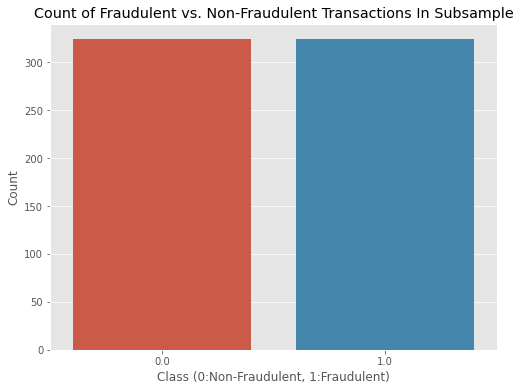

In [ ]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')


In [ ]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-4.834e-01
V2,5.433e-01
V3,-5.932e-01
V4,7.241e-01
V5,-4.629e-01
V6,-3.962e-01
V7,-5.239e-01
V8,6.948e-02
V9,-5.621e-01
V10,-6.562e-01


In [ ]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.593
V7,-0.524
V9,-0.562
V10,-0.656
V12,-0.716
V14,-0.759
V16,-0.652
V17,-0.621
V18,-0.550


In [ ]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V2,0.543
V4,0.724
V11,0.717
Class,1.000


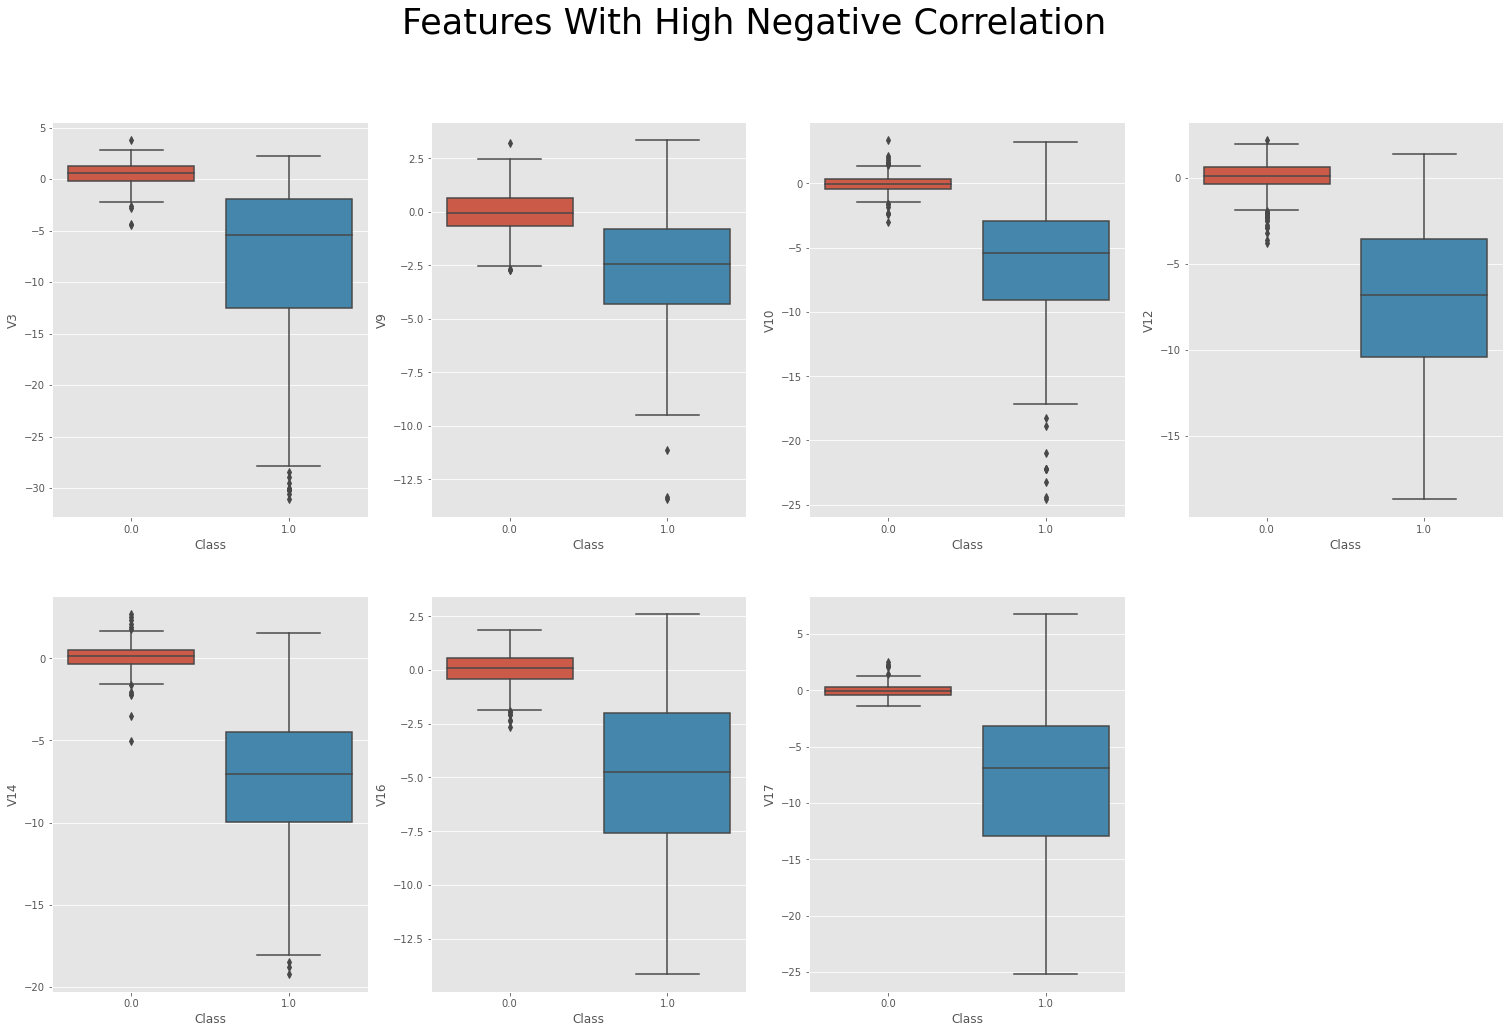

In [ ]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

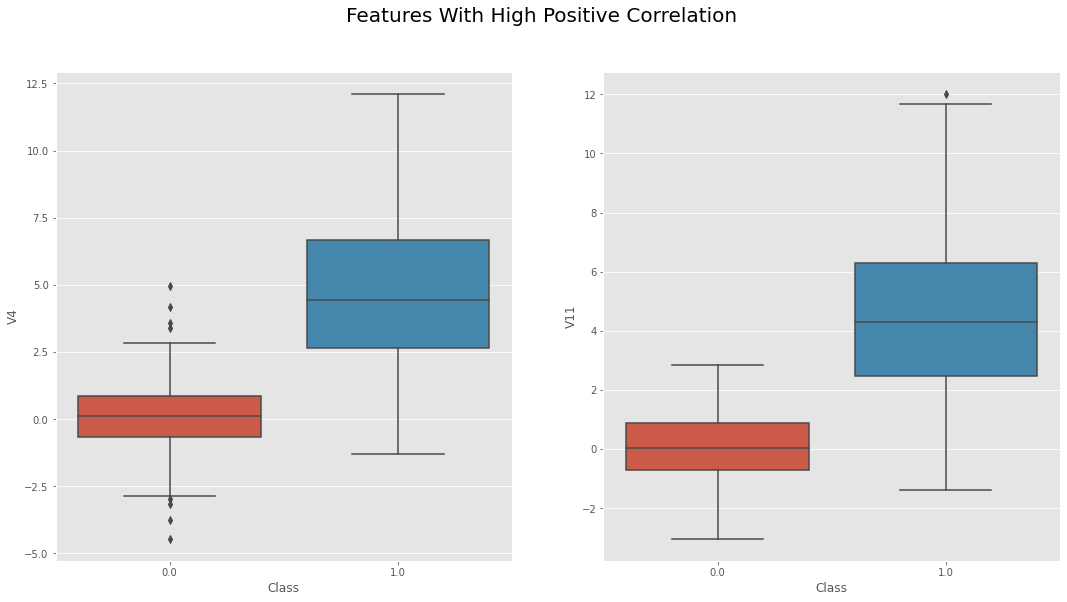

In [ ]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

In [ ]:
#removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [ ]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 648 transactions by 205 transactions to 443 transactions.


In [ ]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [ ]:
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

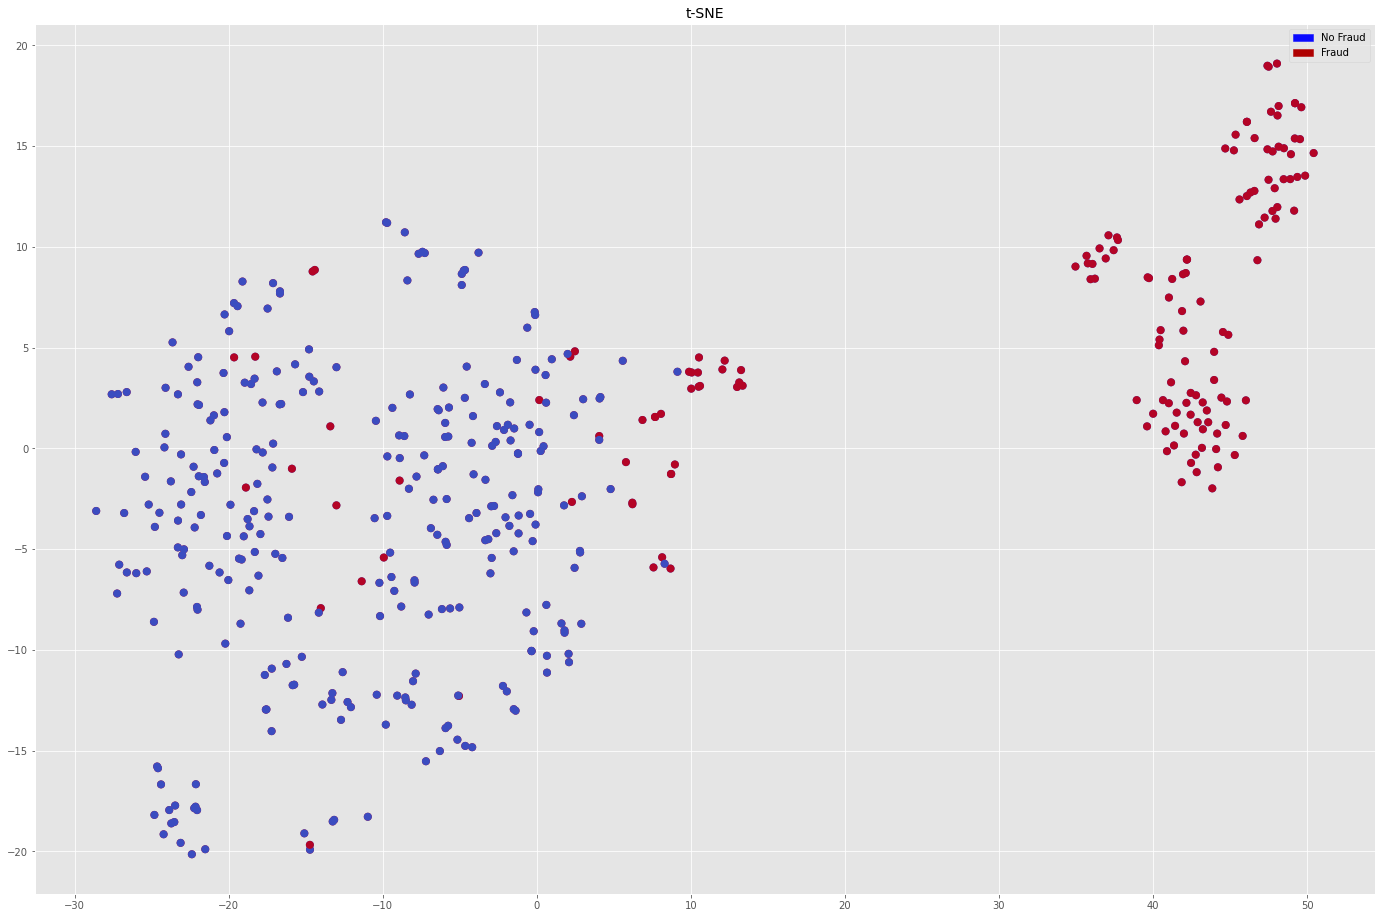

In [ ]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [ ]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (354, 30) (89, 30) 

Y_shapes:
 Y_train: Y_validation:
 (354,) (89,)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.965011 (0.043790)
LDA: 0.965350 (0.040288)
KNN: 0.947902 (0.056571)
CART: 0.900479 (0.071547)
SVM: 0.966935 (0.039781)
XGB: 0.970851 (0.025284)
RF: 0.960430 (0.040123)


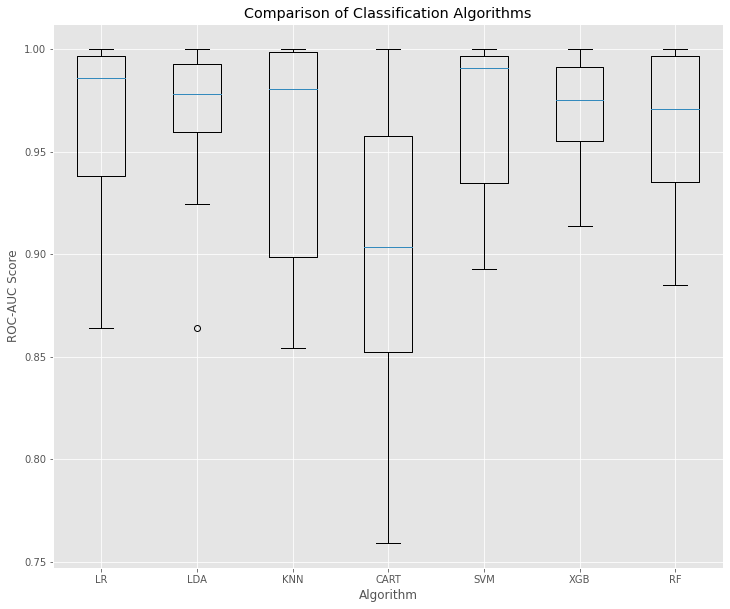

In [ ]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()


In [ ]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')